Install ahijevyc/MetPy branch parcel_with_virtual_temperature. [link](https://github.com/ahijevyc/MetPy/tree/parcel_with_virtual_temperature)
* handles missing dewpoints (water vapor pressure=0, mixing ratio=0, Tv=T)

In [1]:
import logging

import cm1.input.era5
import cm1.input.sounding
import matplotlib.pyplot as plt
import pandas as pd
from cm1.skewt import skewt
from cm1.utils import TMPDIR
from metpy.units import units

# Configure logging
logging.basicConfig(level=logging.WARNING, format="%(asctime)s - %(levelname)s: %(message)s", force=True)

### Predefined CM1 input soundings

/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1613: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1614: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1613: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1614: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
/glade/work/ahijevyc/conda-envs/cm1/lib/python3.12/site-packages/metpy/calc/thermo.py:1613: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_press

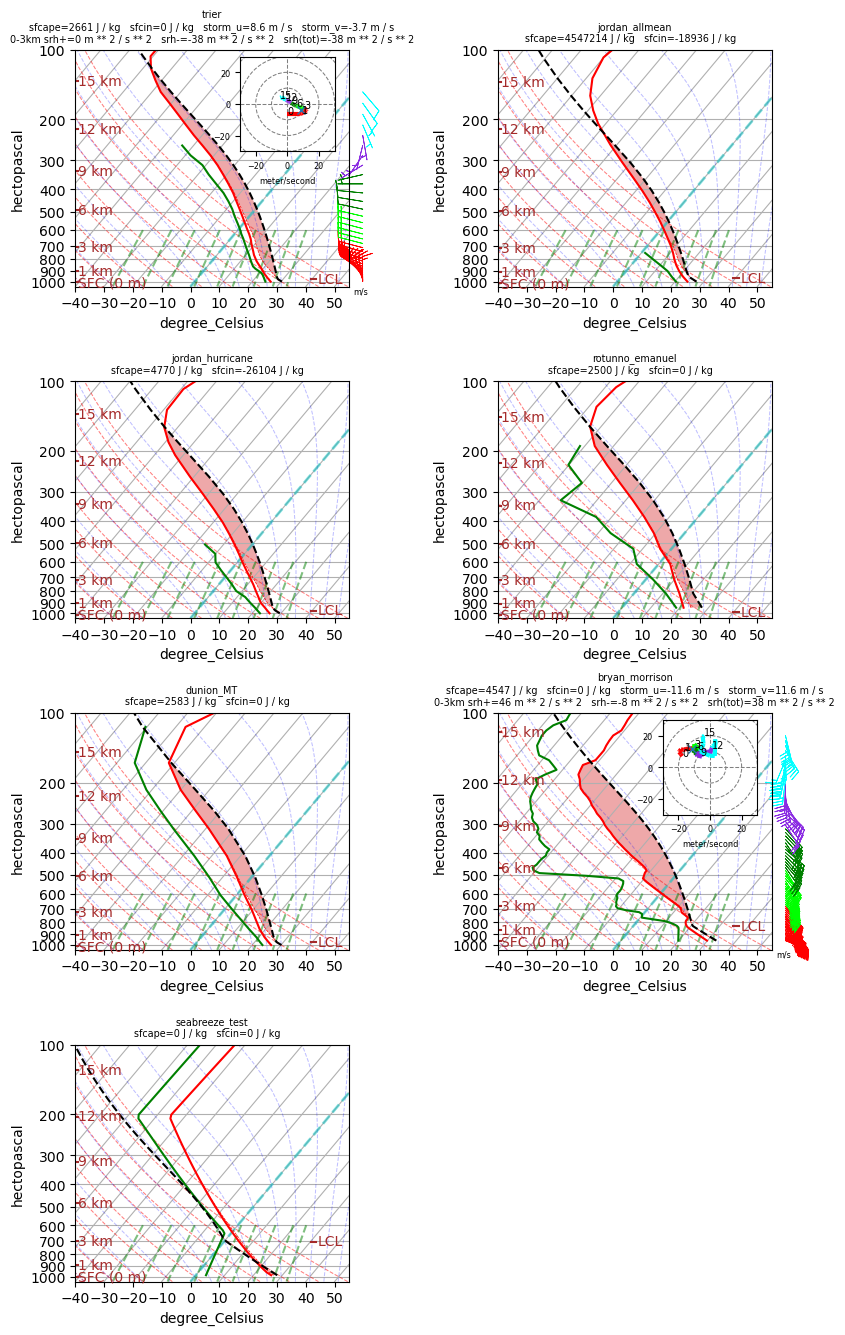

In [2]:
dss = [
    cm1.input.sounding.trier(),
    cm1.input.sounding.jordan_allmean(),
    cm1.input.sounding.jordan_hurricane(),
    cm1.input.sounding.rotunno_emanuel(),
    cm1.input.sounding.dunion_MT(),
    cm1.input.sounding.bryan_morrison(),
    cm1.input.sounding.seabreeze_test(),
]
fig, axes = plt.subplots(
    ncols=2,
    nrows=4,
    sharex=True,
    sharey=True,
    figsize=(10, 16),
    gridspec_kw={"hspace": 0.4},
)
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")

for i, ds in enumerate(dss):
    # Use subplot because skewt() uses metpy.plots.SkewT, which uses it.
    logging.info(ds.attrs["case"])
    skew = skewt(ds, fig=fig, subplot=(4, 2, i + 1))
    skew.ax.set_title(
        ds.attrs["case"] + skew.ax.get_title(), fontsize="x-small"
    )  # Set title to sounding case

In [3]:
valid_time = pd.to_datetime("20240525")
lon = -95 * units.degree_E
lat = 33 * units.degree_N
ds_aws = cm1.input.sounding.era5_aws(valid_time, lat, lon)
ds_aws

2025-02-04 17:04:24,317 - WARNING: Found cached s3 133_q.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:24,318 - WARNING: Found cached s3 130_t.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:24,318 - WARNING: Found cached s3 131_u.ll025uv 2024-05-25 00:00:00
2025-02-04 17:04:24,319 - WARNING: Found cached s3 132_v.ll025uv 2024-05-25 00:00:00
2025-02-04 17:04:24,320 - WARNING: Found cached s3 135_w.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:24,321 - WARNING: Found cached s3 129_z.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:26,786 - WARNING: Found cached s3 134_sp.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:26,787 - WARNING: Found cached s3 165_10u.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:26,788 - WARNING: Found cached s3 166_10v.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:26,789 - WARNING: Found cached s3 167_2t.ll025sc 2024-05-25 00:00:00
2025-02-04 17:04:26,789 - WARNING: Found cached s3 168_2d.ll025sc 2024-05-25 00:00:00


<xarray.Dataset> Size: 2kB
Dimensions:                        (level: 37)
Coordinates:
    longitude                      float64 8B 265.0
    latitude                       float64 8B 33.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/15)
    Q                              (level) float32 148B <Quantity(dask.array<...
    T                              (level) float32 148B <Quantity(dask.array<...
    U                              (level) float32 148B <Quantity(dask.array<...
    V                              (level) float32 148B <Quantity(dask.array<...
    W                              (level) float32 148B <Quantity(dask.array<...
    Z                              (level) float32 148B <Quantity(dask.array<...
    ...                             ...
    VAR_10V                        float32 4B <Quantity(dask.array<getitem, s...
    VAR_2D                         float32 4B <Quantity(dask.array<getitem, s...
    VAR_2T                         float32 4B <Quantity(dask.array<getitem, s...
    surface_potential_temperature  float32 4B <Quantity(dask.array<getitem, s...
    surface_mixing_ratio           float32 4B <Quantity(dask.array<getitem, s...
    Zsfc                           float32 4B <Quantity(121.11624145507812, '...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

### Given a latitude and longitude, select the nearest ERA5 grid point and 4 neighbors
* nearest grid point `G`
* `north` neighbor
* `south`
* `west`
* `east`

2025-02-04 17:06:06,784 - WARNING: filling height using hypsometric equation
2025-02-04 17:06:24,292 - WARNING: some Td > T


G: 33.0210659369, 264.9375


2025-02-04 17:06:24,747 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/G_2024-05-25_00:00:00_264.938_33.021.txt
2025-02-04 17:06:24,814 - WARNING: some Td > T


north: 33.3020962597, 264.9375


2025-02-04 17:06:25,077 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/north_2024-05-25_00:00:00_264.938_33.302.txt
2025-02-04 17:06:25,139 - WARNING: some Td > T


south: 32.7400356134, 264.9375


2025-02-04 17:06:25,406 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/south_2024-05-25_00:00:00_264.938_32.740.txt
2025-02-04 17:06:25,469 - WARNING: some Td > T


west: 33.0210659369, 264.65625


2025-02-04 17:06:25,732 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/west_2024-05-25_00:00:00_264.656_33.021.txt
2025-02-04 17:06:25,794 - WARNING: some Td > T


east: 33.0210659369, 265.21875


2025-02-04 17:06:26,062 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/east_2024-05-25_00:00:00_265.219_33.021.txt


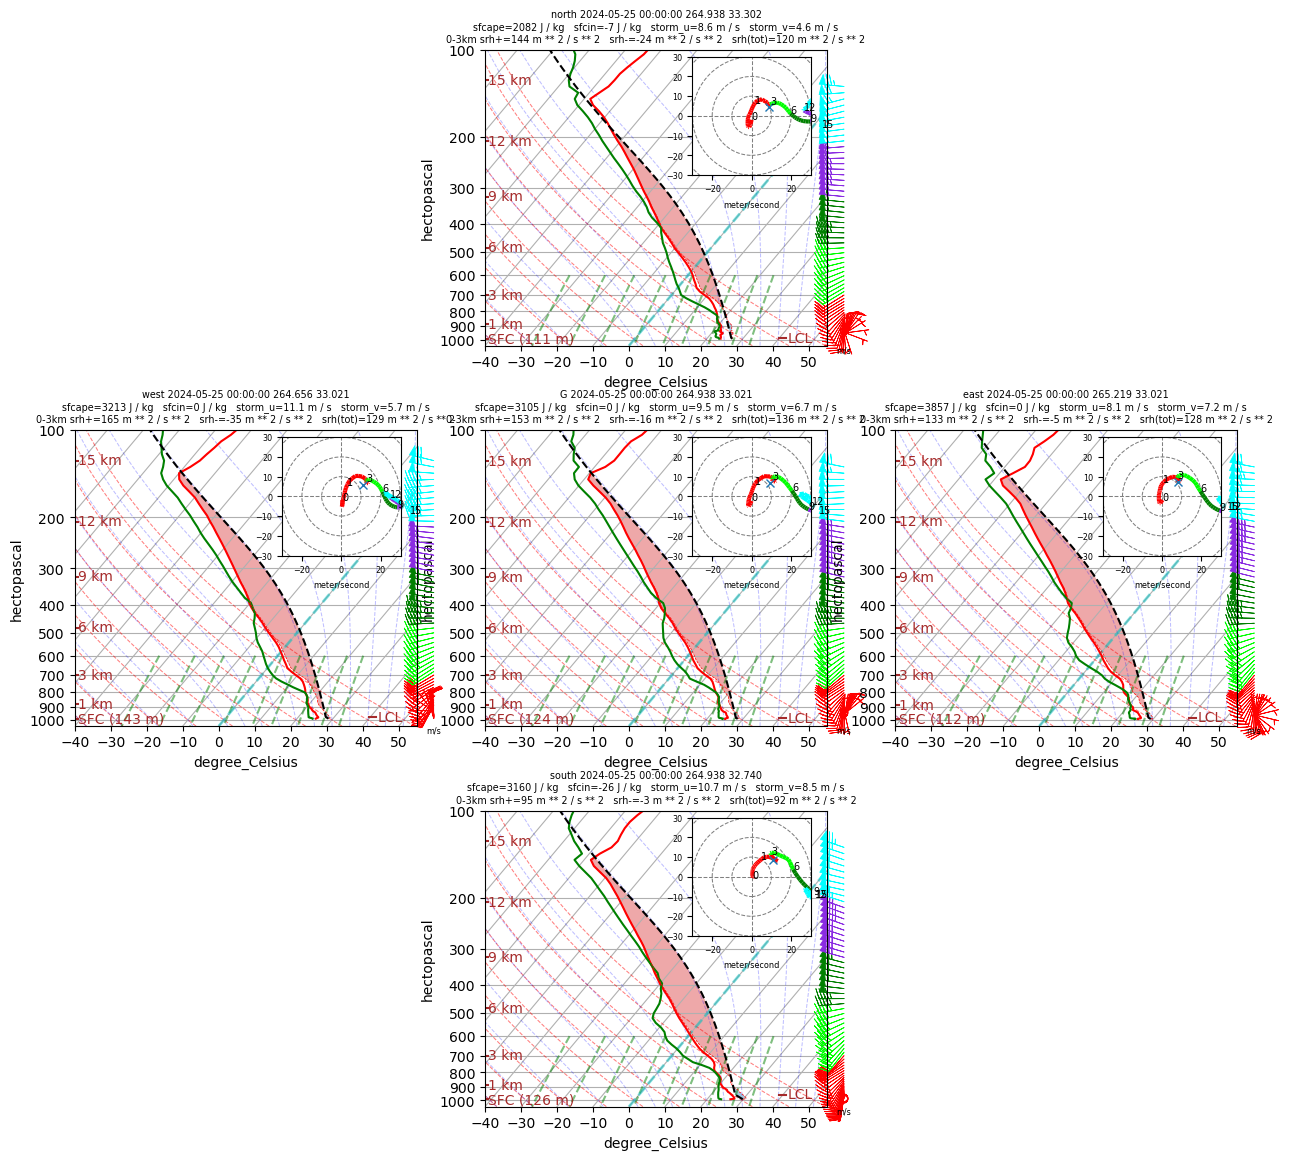

In [6]:
ds0 = cm1.input.era5.model_level(valid_time).load()

isel = cm1.input.era5.nearest_grid_neighbors(ds0, lat=lat, lon=lon)
fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(15, 14))
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")

dss = {}
for k, v in isel.items():
    if k == "G":
        i = 5
    elif k == "north":
        i = 2
    elif k == "south":
        i = 8
    elif k == "west":
        i = 4
    elif k == "east":
        i = 6
    else:
        raise ValueError(f"Unknown value {v}")
    if v is not None:
        ds = ds0.isel(v)
        dss[k] = ds
        print(f"{k}: {ds.latitude.values}, {ds.longitude.values}")
        skew = skewt(ds, fig=fig, subplot=(3, 3, i))
        skew.ax.set_title(f"{k} {skew.ax.get_title()}", fontsize="x-small")
        ofile = TMPDIR / f"{skew.ax.get_title().split('\n')[0].replace(' ','_')}.txt"
        with open(ofile, "w") as f:
            f.write(cm1.input.sounding.to_txt(ds))
            logging.warning(ofile)

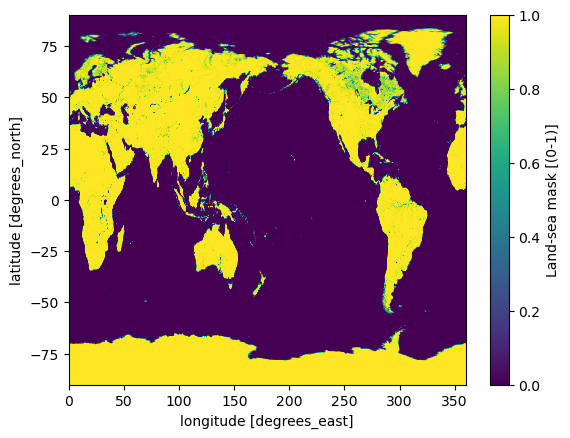

In [ ]:
invariant = cm1.input.era5.invariant()
invariant.LSM.plot()

In [6]:
from io import StringIO

s = cm1.input.sounding.to_txt(dss["G"])
print(s)
pd.read_csv(StringIO(s), skiprows=1, sep=" ", names=["Z", "theta", "Q", "U", "V"])

1010.2531250000001 290.2548533417929 11.744891166687012
12.599104621686964 290.2548533417929 11.744891 -7.0762177 6.2774696
33.925397296437616 290.52496082863627 11.681634 -9.139694 8.082659
57.29154628901278 290.72150061214853 11.639602 -10.423313 9.265244
82.8749807704657 290.87710465856156 11.611795 -11.461298 10.223785
110.87218098903162 291.0308894115763 11.588733 -12.36343 11.060068
141.4991904905725 291.19629647871676 11.57096 -13.216639 11.863081
174.9874217059055 291.35637422385923 11.555847 -14.041773 12.652447
211.58440688757986 291.52605925453776 11.540716 -14.849779 13.4263
251.54865610729135 291.70809546478745 11.528796 -15.604927 14.222988
295.1733673894081 291.94230404013626 11.511629 -16.279497 15.075281
342.77612675170815 292.23154245579974 11.479614 -16.74125 15.9737015
394.67575212430154 292.5531241540912 11.42954 -16.904615 16.845938
451.21553658491143 292.87456792000256 11.384717 -16.634308 17.647797
512.7613641876848 293.2002254042699 11.373102 -16.009783 18.1932

,Z,theta,Q,U,V
0,12.599105,290.254853,11.744891,-7.076218,6.277470
1,33.925397,290.524961,11.681634,-9.139694,8.082659
2,57.291546,290.721501,11.639602,-10.423313,9.265244
3,82.874981,290.877105,11.611795,-11.461298,10.223785
4,110.872181,291.030889,11.588733,-12.363430,11.060068
...,...,...,...,...,...
132,64310.599910,3267.268286,0.003714,57.143240,15.437443
133,66658.115227,3497.337383,0.003362,52.534370,2.918610
134,69078.825246,3765.135186,0.002947,43.353745,-4.889313
135,71589.536592,4124.898310,0.002339,31.941856,0.618408


## Show difference between pressure-level and model level soundings
* fewer pressure levels than model levels
* winds at surface (10u and 10v) not in pressure-level sounding

2025-01-22 17:37:35,823 - INFO: load dataset
2025-01-22 17:37:36,414 - INFO: After dropping low pressure levels, 32/37 remain
2025-01-22 17:37:36,419 - WARNING: some Td > T
2025-01-22 17:37:36,449 - INFO: p_parcel 101021.921875 Pa t_parcel 290.9503173828125 K Td_parcel 16.266754150390625 °C q_parcel 0.011590342037379742
2025-01-22 17:37:36,450 - INFO: lcl_p 98742.4765625 Pa lcl_t 289.059326171875 K
2025-01-22 17:37:36,519 - INFO: work on winds and kinematics
2025-01-22 17:37:36,537 - INFO: Create hodograph
2025-01-22 17:37:36,841 - INFO: load dataset
2025-01-22 17:37:36,896 - INFO: After dropping low pressure levels, 108/137 remain
2025-01-22 17:37:36,905 - WARNING: some Td > T
2025-01-22 17:37:36,933 - INFO: p_parcel 101025.3125 Pa t_parcel 291.0034484863281 K Td_parcel 16.471343994140625 °C q_parcel 0.011744891293346882
2025-01-22 17:37:36,935 - INFO: lcl_p 98969.046875 Pa lcl_t 289.2987365722656 K
2025-01-22 17:37:37,081 - INFO: work on winds and kinematics
2025-01-22 17:37:37,107 -

Text(0.5, 1.0, 'model level  2023-12-25T00:00:00.000000000 270.000 29.930\nsfcape=3 J / kg   sfcin=-75 J / kg   storm_u=2.3 m / s   storm_v=16.5 m / s\n0-3km srh+=290 m ** 2 / s ** 2   srh-=0 m ** 2 / s ** 2   srh(tot)=290 m ** 2 / s ** 2')

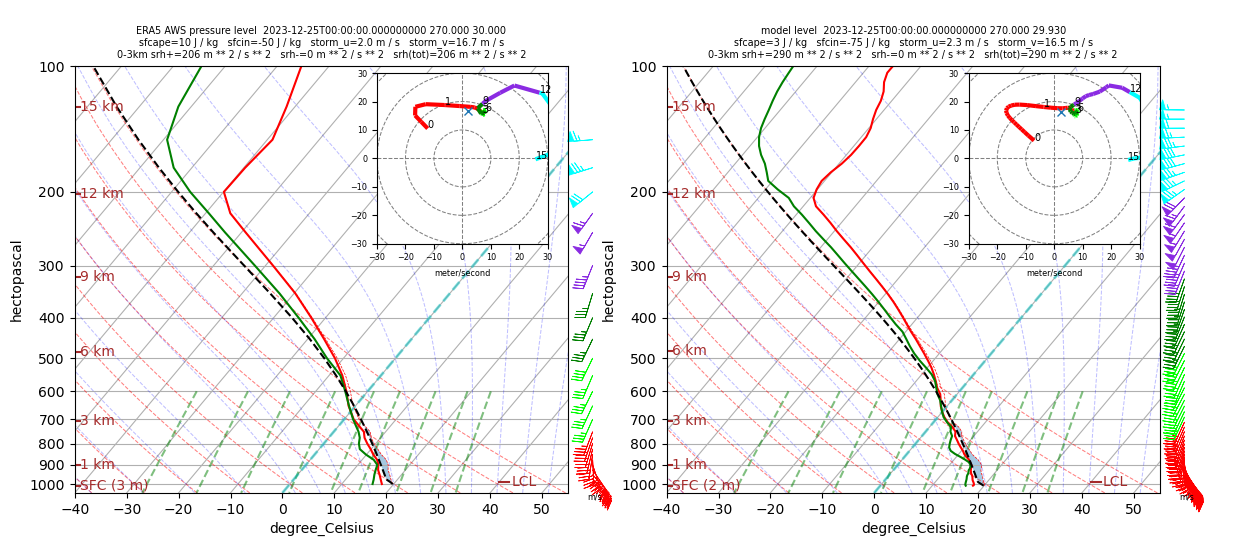

In [7]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(14, 7))
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")
skew = skewt(ds_aws, fig=fig, subplot=(1, 2, 1))
skew.ax.set_title(f"ERA5 AWS pressure level  {skew.ax.get_title()}", fontsize="x-small")
skew = skewt(ds0.isel(isel["G"]), fig=fig, subplot=(1, 2, 2))
skew.ax.set_title(f"model level  {skew.ax.get_title()}", fontsize="x-small")

In [8]:
cm1.input.sounding.to_txt(ds_aws)

'1010.21921875 290.1063537597656 11.590341567993164\n89.8779 290.8722229003906 11.457531 -12.189728 10.517899\n306.5799 292.00899962618723 11.360256 -16.621536 15.096771\n528.11554 293.1961882912033 11.193417 -16.521042 18.15097\n754.6863 294.34446417230384 11.102833 -12.888977 19.059769\n986.7415 295.8676562678203 11.0529995 -6.397415 18.76886\n1224.5704 297.16453383396356 10.289255 -0.9247894 18.402832\n1467.9886 297.97549585345695 9.036573 2.6838531 18.136414\n1717.2339 299.0625943203212 8.09251 4.304489 17.929047\n1972.7035 300.0429029081891 7.7510796 5.3221283 17.486145\n2234.8252 301.21507603039373 7.5852723 5.8669434 17.002869\n2504.215 302.8697517128821 7.2106724 6.3673553 16.655823\n3065.7734 304.47983713593976 6.205708 7.076721 16.011703\n3660.3867 307.4234826519997 5.388891 7.0618286 15.142181\n4295.867 311.3347478181764 4.6383033 7.6704865 15.559921\n4978.082 315.2163809342778 3.878275 7.2854767 17.013855\n5714.706 318.7708057287598 2.776053 8.227112 16.958817\n6514.0127 32

In [9]:
ds = cm1.input.sounding.era5_pressure_level(valid_time, lat, lon)
ds

2025-01-22 17:37:38,934 - INFO: opened 6 local e5.oper.an.pl files
2025-01-22 17:37:38,935 - INFO: selected 2023-12-25 00:00:00
2025-01-22 17:37:39,928 - INFO: opened 6 local e5.oper.an.sfc files
2025-01-22 17:37:39,929 - INFO: selected 2023-12-25 00:00:00


<xarray.Dataset> Size: 2kB
Dimensions:                        (level: 37)
Coordinates:
    latitude                       float64 8B 30.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    longitude                      float64 8B 270.0
    time                           datetime64[ns] 8B 2023-12-25
Data variables: (12/16)
    Q                              (level) float32 148B <Quantity(dask.array<...
    T                              (level) float32 148B <Quantity(dask.array<...
    U                              (level) float32 148B <Quantity(dask.array<...
    V                              (level) float32 148B <Quantity(dask.array<...
    W                              (level) float32 148B <Quantity(dask.array<...
    Z                              (level) float32 148B <Quantity(dask.array<...
    ...                             ...
    VAR_10V                        float32 4B <Quantity(dask.array<getitem, s...
    VAR_2D                         float32 4B <Quantity(dask.array<getitem, s...
    VAR_2T                         float32 4B <Quantity(dask.array<getitem, s...
    surface_potential_temperature  float32 4B <Quantity(dask.array<getitem, s...
    surface_mixing_ratio           float32 4B <Quantity(dask.array<getitem, s...
    Zsfc                           float32 4B <Quantity(2.6965219974517822, '...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc59 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Fri 10 May 2024 02:57:50 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri May 10 14:58:09 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

2025-01-22 17:37:40,054 - INFO: load dataset
2025-01-22 17:37:47,342 - INFO: After dropping low pressure levels, 32/37 remain
2025-01-22 17:37:47,348 - WARNING: some Td > T
2025-01-22 17:37:47,381 - INFO: p_parcel 101021.921875 Pa t_parcel 290.9503173828125 K Td_parcel 16.266754150390625 °C q_parcel 0.011590342037379742
2025-01-22 17:37:47,382 - INFO: lcl_p 98742.4765625 Pa lcl_t 289.059326171875 K
2025-01-22 17:37:47,453 - INFO: work on winds and kinematics
2025-01-22 17:37:47,471 - INFO: Create hodograph


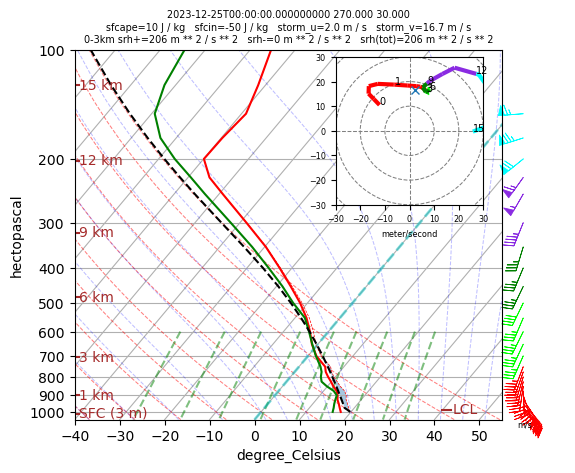

In [10]:
skewt(ds)

In [11]:
invariant

<xarray.Dataset> Size: 58MB
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables: (12/14)
    ANOR       (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    CL         (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    CVH        (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    CVL        (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    DL         (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    ISOR       (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    ...         ...
    SDOR       (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    SLOR       (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    SLT        (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    TVH        (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    TVL        (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
    Z          (latitude, longitude) float32 4MB dask.array<chunksize=(721, 1440), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper04 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon May 13 18:10:34 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 18:10:34 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)